In [1]:

from __future__ import print_function

import sys

sys.path.extend(['/home/jorg/repository/dcnn_mri_seg'])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm


from datetime import datetime
from pytz import timezone
import itertools
import copy

import SimpleITK as sitk
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import init

import numpy as np
import dill
import os
import glob
from collections import OrderedDict

from common.load_data import LASunnyBrooksMRI
from utils.config import config

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# constants
input_dir = "/mnt/u_drive/u_share/data/la_sunnybrook/"

data_set = LASunnyBrooksMRI(config.data_dir, config.dflt_image_name + ".mhd")

Info: Loading image /mnt/u_drive/u_share/data/la_sunnybrook/a001/image.mhd
gt /mnt/u_drive/u_share/data/la_sunnybrook/a001/gt_binary.mhd
Info: Loading image /mnt/u_drive/u_share/data/la_sunnybrook/a002/image.mhd
gt /mnt/u_drive/u_share/data/la_sunnybrook/a002/gt_binary.mhd
Info: Loading image /mnt/u_drive/u_share/data/la_sunnybrook/a003/image.mhd
gt /mnt/u_drive/u_share/data/la_sunnybrook/a003/gt_binary.mhd
Info: Loading image /mnt/u_drive/u_share/data/la_sunnybrook/a004/image.mhd
gt /mnt/u_drive/u_share/data/la_sunnybrook/a004/gt_binary.mhd


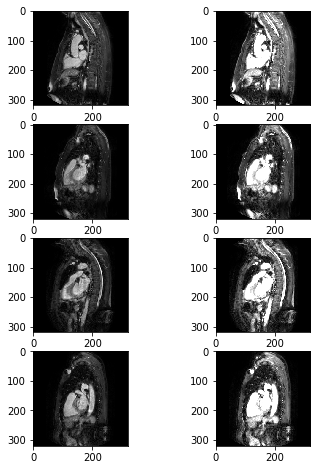

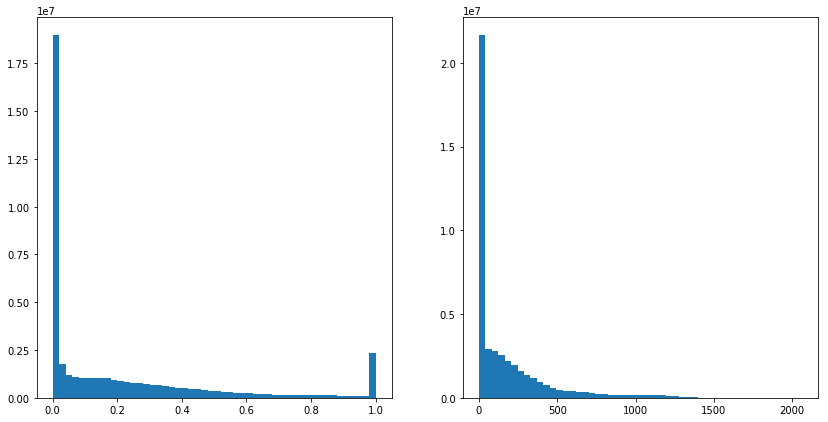

In [3]:

all_data_raw = np.empty(0)
all_data_norm = np.empty(0)

l_dataset = data_set.__len__()
series_idx = 50
fig = plt.figure(figsize=(6, 8))
counter = 0
data_set.normalize_values()

for idx in np.arange(l_dataset):
    img = data_set.images_raw[idx]
    img_norm = data_set.images[idx]
    all_data_raw = np.append(all_data_raw, np.ravel(img))
    all_data_norm = np.append(all_data_norm, np.ravel(img_norm))
    counter += 1
    ax = plt.subplot(l_dataset, 2, counter)
    plt.imshow(img[series_idx], cmap=cm.gray)
    counter += 1
    ax = plt.subplot(l_dataset, 2, counter)
    plt.imshow(img_norm[series_idx], cmap=cm.gray)

plt.show()
plt.close()

data_set.show_histogram(raw=True)

(320, 320)
(320, 320)
0.0 1516.0


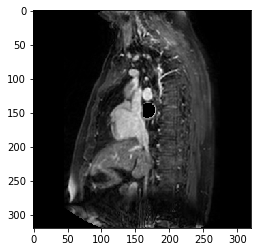

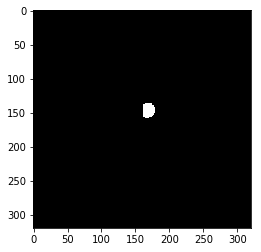

In [71]:
target = 67
for idx, img_details in enumerate(images):
    img = img_details[0][target] # + gt_img_segs[idx][0]
    if idx == 0:
        print(img.shape)
        mask = gt_img_segs[idx][0][target] == 1
        print(mask.shape)
        print(np.min(img), np.max(img))
        img[mask] = 0

        plt.imshow(img[:, :], cmap=cm.gray)
        plt.show()
        plt.imshow(mask, cmap=cm.gray)

In [11]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
    
def cube_show_slider(cube, axis=2, **kwargs):
    """
    Display a 3d ndarray with a slider to move along the third dimension.

    Extra keyword arguments are passed to imshow
    """
    

    # check dim
    if not cube.ndim == 3:
        raise ValueError("cube should be an ndarray with ndim == 3")

    # generate figure
    fig = plt.figure()
    ax = plt.subplot(111)
    fig.subplots_adjust(left=0.25, bottom=0.25)

    # select first image
    s = [slice(0, 1) if i == axis else slice(None) for i in xrange(3)]
    im = cube[s].squeeze()

    # display image
    l = ax.imshow(im, **kwargs)

    # define slider
    axcolor = 'lightgoldenrodyellow'
    ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)

    slider = Slider(ax, 'Axis %i index' % axis, 0, cube.shape[axis] - 1,
                    valinit=0, valfmt='%i')

    def update(val):
        ind = int(slider.val)
        s = [slice(ind, ind + 1) if i == axis else slice(None)
                 for i in xrange(3)]
        im = cube[s].squeeze()
        l.set_data(im, **kwargs)
        fig.canvas.draw()

    slider.on_changed(update)

    plt.show()

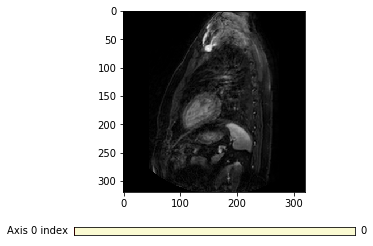

In [12]:
img_series1 = data_set.__getitem__(0)[0]
cube_show_slider(img_series1, axis=0, cmap=cm.gray)